<a href="https://colab.research.google.com/github/rocx320/MachineLearning/blob/main/2247226_ML_LAB_3_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#For PCA
from sklearn.decomposition import PCA

#Train Dataset

In [5]:
# from google.colab import files
# uploaded = files.upload()

In [6]:
data=pd.read_csv("train.csv")
type(data)
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
data.shape

(2000, 21)

###Preprocessing

In [9]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

###Checking of null values

In [11]:
data.isnull().values.any()

False

###Visualization of dataset

In [12]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


###Finding unique class values for categorizing and encoding categorical data

In [13]:
category=data['price_range'].unique()
print("The number of unique classes in level prediction:",data['price_range'].nunique())
print("The unique values for level: ",category)

The number of unique classes in level prediction: 4
The unique values for level:  [1 2 3 0]


###Extracting the independent variables(Features) and the dependent variables(Label)

In [14]:
X = data.drop(columns=['price_range'],axis=1)
y = data['price_range']
print("Features: ")
print(X)
print("Target: ")
print(y)

Features: 
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  

###Feature Scaling

In [15]:
sc = StandardScaler()
scaled_data = pd.DataFrame(sc.fit_transform(X))
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


###Visualization the dataset before performing PCA

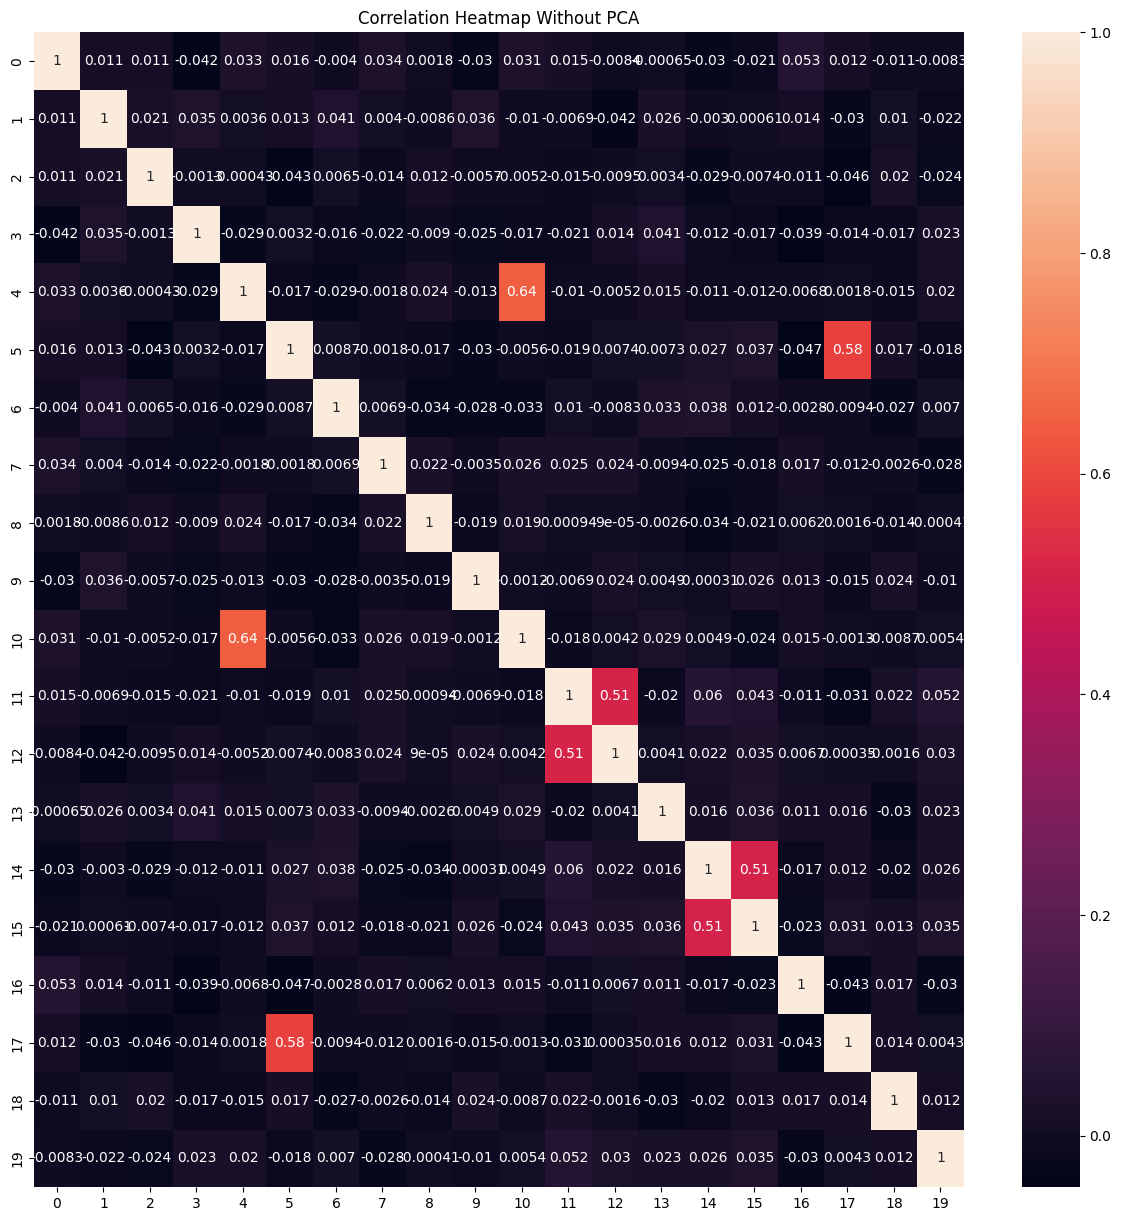

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(scaled_data.corr(), annot=True)
plt.title('Correlation Heatmap Without PCA')

# Display the plot
plt.show()

###Applying PCA to reduce the number of columns from dataset to reduce dimensionality

In [17]:
pca = PCA()
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca)
explained_variances = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratios
cumulative_variances = np.cumsum(explained_variances)

# Determine the number of principal components needed for maximum variance
num_components_for_max_variance = np.argmax(cumulative_variances >= 0.95) + 1

# Print the percentage of variance explained by each principal component
for i, variance in enumerate(explained_variances):
    print(f"Principal Component {i+1}: {variance*100:.2f}% variance explained")

# Print the number of principal components needed for maximum variance
print(f"\nNumber of Principal Components for 95% Variance: {num_components_for_max_variance}")

Principal Component 1: 8.39% variance explained
Principal Component 2: 8.11% variance explained
Principal Component 3: 7.91% variance explained
Principal Component 4: 7.15% variance explained
Principal Component 5: 5.61% variance explained
Principal Component 6: 5.44% variance explained
Principal Component 7: 5.33% variance explained
Principal Component 8: 5.10% variance explained
Principal Component 9: 5.09% variance explained
Principal Component 10: 5.03% variance explained
Principal Component 11: 4.90% variance explained
Principal Component 12: 4.87% variance explained
Principal Component 13: 4.76% variance explained
Principal Component 14: 4.76% variance explained
Principal Component 15: 4.49% variance explained
Principal Component 16: 4.38% variance explained
Principal Component 17: 2.50% variance explained
Principal Component 18: 2.36% variance explained
Principal Component 19: 2.06% variance explained
Principal Component 20: 1.75% variance explained

Number of Principal Componen

###So by taking just 18 principal components we can reduce the dimensionality of the dataset and remove correlations between all principal components.

In [18]:
pca = PCA(n_components = 18)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

###Co-variance Matrix Display

In [19]:
cov_matrix = np.cov(data_pca, rowvar=False)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 1.67809669e+00  3.88328133e-16 -1.17298201e-16 -5.14956873e-16
   7.63326926e-16 -1.33293410e-16  1.46178439e-16 -2.76361669e-16
  -3.55449092e-18 -4.17652684e-17 -8.21976026e-18  1.27961673e-16
   1.01302991e-16 -3.24347297e-17 -2.48147898e-16  5.58055075e-16
  -1.20852691e-16 -9.98811950e-16]
 [ 3.88328133e-16  1.62330659e+00  2.37595503e-16 -1.03080237e-16
  -2.76139514e-16 -3.53671847e-16 -2.37262269e-16 -3.55449092e-17
   3.55449092e-17  3.42119751e-17  1.75947301e-16  2.19267659e-16
  -1.11077841e-17  1.95497001e-17 -2.39928137e-17 -3.23458674e-16
   1.48844307e-16  6.74464653e-16]
 [-1.17298201e-16  2.37595503e-16  1.58336253e+00 -2.85247897e-16
   8.26419140e-17  2.81693406e-16  1.80834726e-16 -1.56397601e-16
  -1.95497001e-17 -3.83885020e-16 -2.07937719e-16  5.59832321e-17
   2.27487419e-16 -1.38625146e-16 -1.68560624e-17  5.77604775e-17
   1.73281433e-16 -1.99051492e-16]
 [-5.14956873e-16 -1.03080237e-16 -2.85247897e-16  1.42975987e+00
  -7.09120939e-16 

###Displaying Eigen Values and Eigen Vector

In [20]:
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[1.67809669 1.62330659 1.58336253 1.42975987 1.12207212 1.08768022
 1.06617731 1.02092877 1.0175506  1.00618845 0.9812144  0.97531969
 0.95271479 0.95212529 0.89928323 0.87655734 0.50105488 0.47253596]
Eigenvectors:
[[ 7.60743471e-02  9.23777150e-03  4.69247357e-02 -3.01468646e-02
   5.75928505e-01 -2.45482620e-01 -7.36480028e-02  3.97854284e-02
   7.10082032e-02 -1.17031017e-02  5.75010646e-01 -1.64696509e-01
  -1.52018063e-01  8.25708318e-03 -2.63950459e-01 -2.80910865e-01
   6.44582425e-02 -2.27040392e-01 -3.04592789e-02 -2.69186409e-02]
 [ 3.22473054e-02 -3.44118882e-02 -9.70373015e-02 -4.00388816e-02
   3.69308828e-01  5.13723466e-01 -1.23158512e-02 -1.07448080e-02
  -1.17823400e-02 -3.33152688e-02  3.72145560e-01  6.93892555e-02
   9.06775896e-02  6.16312995e-02  2.74456496e-01  2.77441758e-01
  -8.33777399e-02  5.17361865e-01  2.59163494e-03  5.18625257e-02]
 [-2.02286755e-02 -3.44078066e-02  3.65331722e-03 -2.65226162e-02
   1.43541439e-01 -3.45395184e-01  1.293496

###Displaying the transformed data

In [21]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.323497,-2.616894,-0.587733,1.255776,-0.434201,-1.027357,1.875229,-0.016013,-0.976154,1.418092,0.496226,-0.929405,-0.204771,0.676215,1.052378,-1.715250,-0.695525,-0.267118
1,-1.998340,0.572836,0.344679,-1.113777,0.573443,1.250394,-0.438609,-0.075111,-0.315092,-1.029457,-1.301769,0.519323,0.723118,1.061393,-1.198784,0.422644,0.513952,1.391796
2,-1.301465,0.190101,0.085441,-1.976486,0.610520,0.688337,-1.180301,-0.529955,-1.130957,-1.377908,-1.470089,0.018760,0.487706,1.377705,-0.640987,-0.011965,0.494988,-0.029530
3,-1.149410,-0.274381,1.666841,-0.234412,-0.550274,0.229234,-0.915311,0.629011,-1.605108,-1.192263,0.935184,-0.243802,-0.801150,0.194903,0.329372,-2.044077,0.299631,0.121473
4,1.636494,1.291291,-0.296079,-1.831218,-1.755646,1.063599,-0.165076,0.579110,0.973719,-0.081522,-0.670432,0.427740,1.231384,0.151592,-0.849615,-0.149835,0.284135,-0.869954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.903997,0.581778,0.652711,-1.878627,-0.899261,-0.744025,-1.940337,-1.166270,-1.073436,-0.768855,-0.977365,2.095601,0.858294,0.768829,0.815784,-0.641351,0.391222,0.359362
1996,-1.445462,-0.839583,1.169373,-0.737419,-0.138226,0.811833,-0.449874,1.521525,-0.126258,2.626154,-0.222404,0.033723,0.892308,-0.751803,0.365753,0.992795,-1.192649,0.201205
1997,-1.255341,-0.166033,-0.747082,-2.030030,-0.079002,0.357773,-0.856139,-0.832216,-0.043710,-0.338712,-0.070688,0.708036,-1.920152,-0.093934,-1.375636,2.017672,0.210182,0.250192
1998,-1.223994,0.950094,-0.800276,1.597982,-1.482435,-1.088828,0.305212,-0.798220,1.643557,1.338114,0.126544,-0.604027,1.287704,-0.061416,0.561876,0.924178,0.398357,-0.185215


###Visualize the dataset

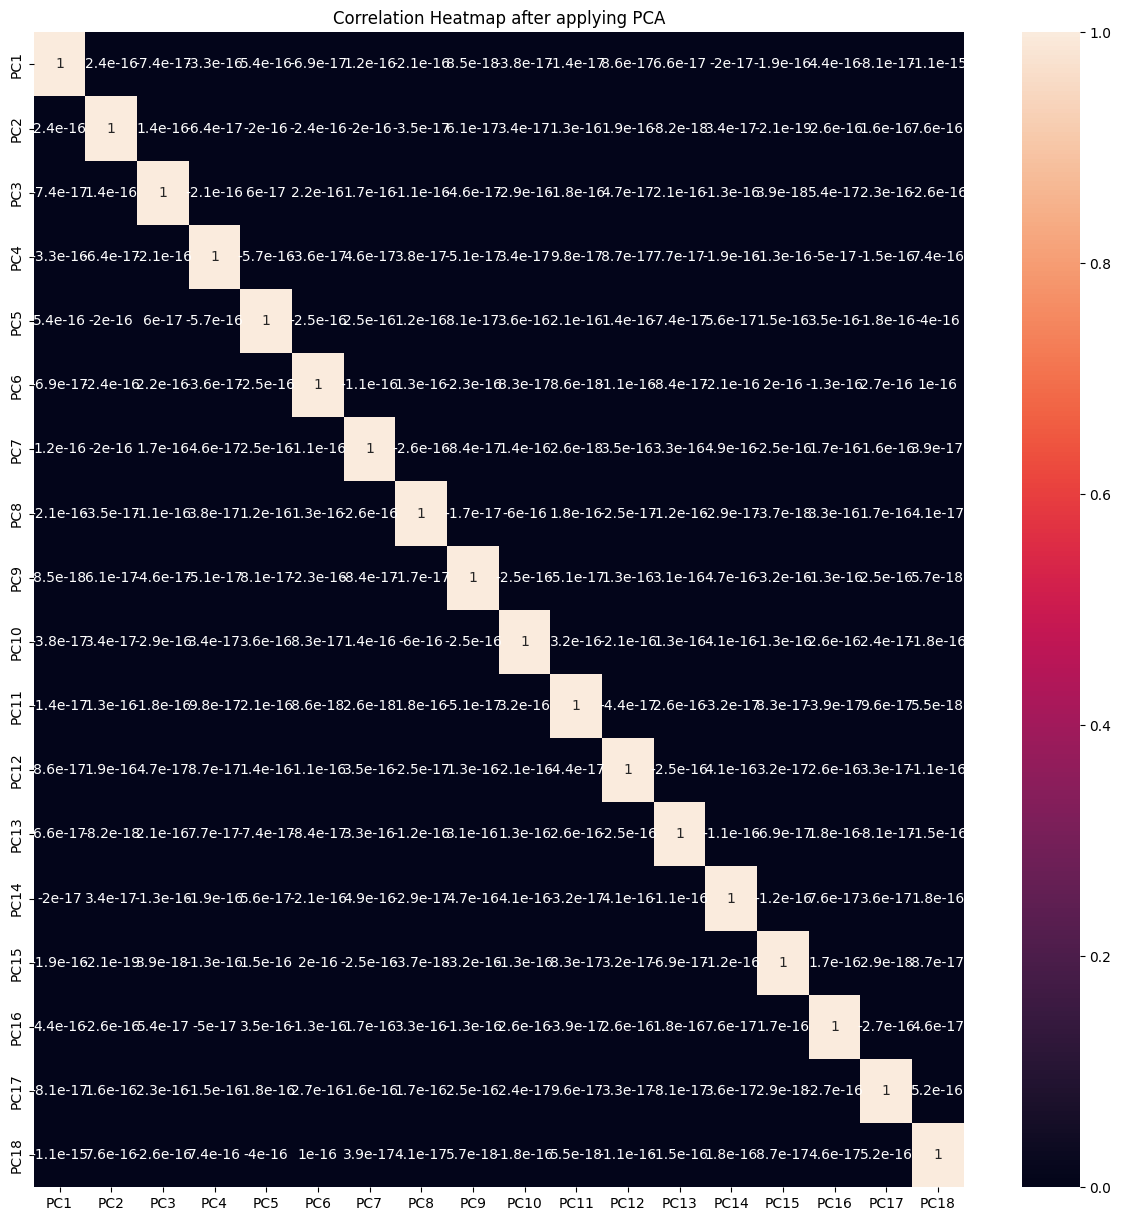

In [22]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_pca.corr(),annot=True)
plt.title('Correlation Heatmap after applying PCA')

# Display the plot
plt.show()